# This project was made using DataQuest.io's learning platform. The aim of the project was to help developers understand what type of apps are more likely to attract users on Google Play and the App Store.

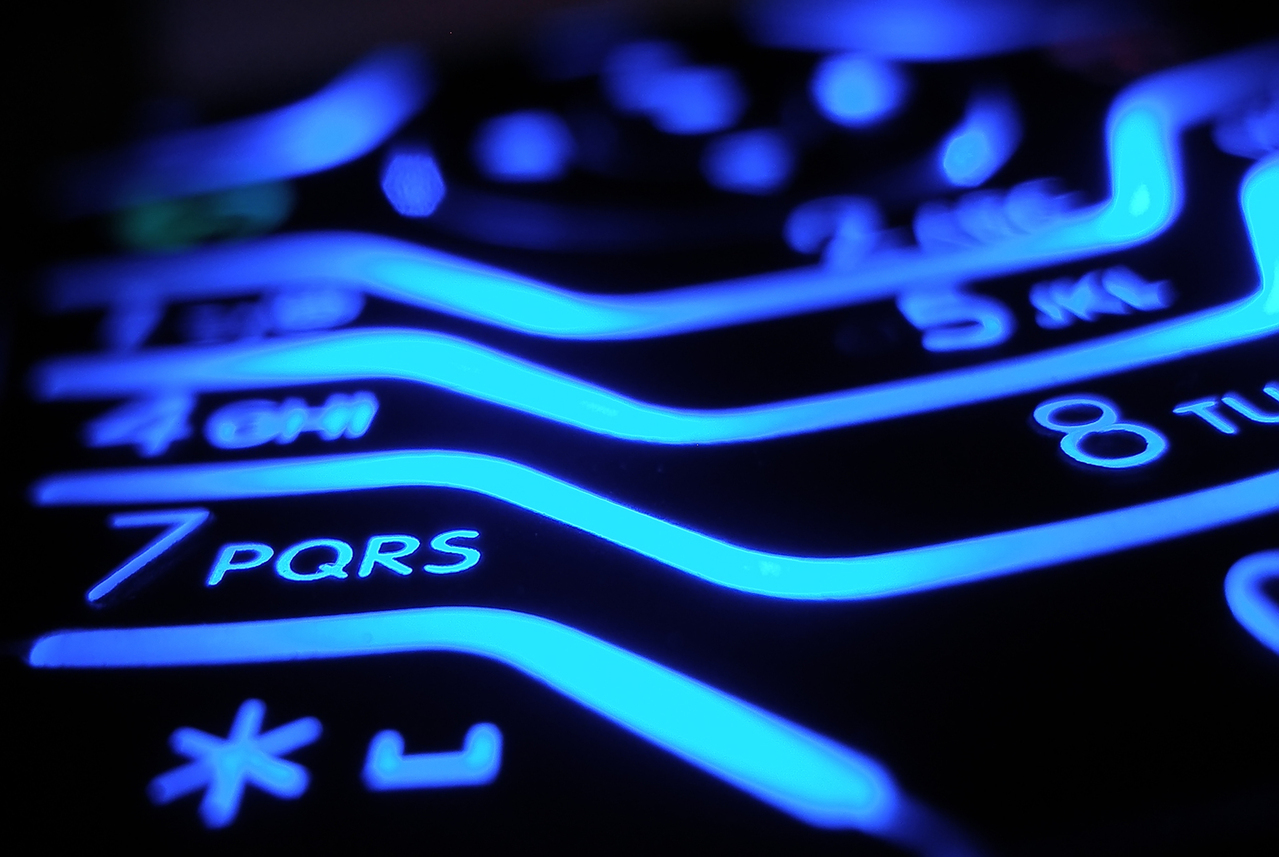

**First things first, let's read in the data. I see that we have two datasets that we will be working with and
since both require the same methodology to make the data "python-ready", I figure it is a great opportunity
to create a function.**

----------------------------------------------------------------------------------------------------------------

In [324]:
from csv import reader #import package I need to read in the data

def import_data(dataset):
    opened_file = open(dataset, encoding='utf-8')
    read_file = reader(opened_file)
    apps_data = list(read_file)
    return apps_data

apple_data = import_data('Applestore.csv') 
google_play_data = import_data('googleplaystore.csv')

**Let's check out those headers and see if we can see some similarities between the datasets**

---------------------------------------------------------

In [325]:
apple_data_headers = apple_data[0]
google_play_headers = google_play_data[0]
print("Apple store headers: {0}".format(apple_data_headers) ,'\n')

print("Google play headers: {0}".format(google_play_headers))


Apple store headers: ['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

Google play headers: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


**We can see some similiar columns in terms of price, maybe genre, rating, and size. However, we need to take a 
deeper dive into the data to be sure we can compare apples to apples.**

----

**We should take a look at a couple snapshots of the datasets so we also know what each looks like**

In [326]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

# Apple Dataset snapshot

In [327]:
explore_data(apple_data, 10, 30)

['343200656', 'Angry Birds', '175966208', 'USD', '0.0', '824451', '107', '4.5', '3.0', '7.4.0', '4+', 'Games', '38', '0', '10', '1']


['512939461', 'Subway Surfers', '156038144', 'USD', '0.0', '706110', '97', '4.5', '4.0', '1.72.1', '9+', 'Games', '38', '5', '1', '1']


['362949845', 'Fruit Ninja Classic', '104590336', 'USD', '1.99', '698516', '132', '4.5', '4.0', '2.3.9', '4+', 'Games', '38', '5', '13', '1']


['359917414', 'Solitaire', '101943296', 'USD', '0.0', '679055', '9673', '4.5', '4.5', '4.11.2', '4+', 'Games', '38', '4', '11', '1']


['469369175', 'CSR Racing', '524803072', 'USD', '0.0', '677247', '2029', '4.5', '4.5', '4.0.1', '4+', 'Games', '37', '5', '10', '1']


['924373886', 'Crossy Road - Endless Arcade Hopper', '165471232', 'USD', '0.0', '669079', '1087', '4.5', '4.5', '1.5.4', '9+', 'Games', '38', '5', '13', '1']


['575658129', 'Injustice: Gods Among Us', '1829599232', 'USD', '0.0', '612532', '410', '4.5', '4.5', '2.15.1', '12+', 'Games', '39', '5', '13', '1']


['5

In [328]:
explore_data(google_play_data, 10, 14)

['Kids Paint Free - Drawing Fun', 'ART_AND_DESIGN', '4.7', '121', '3.1M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'July 3, 2018', '2.8', '4.0.3 and up']


['Text on Photo - Fonteee', 'ART_AND_DESIGN', '4.4', '13880', '28M', '1,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'October 27, 2017', '1.0.4', '4.1 and up']


['Name Art Photo Editor - Focus n Filters', 'ART_AND_DESIGN', '4.4', '8788', '12M', '1,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'July 31, 2018', '1.0.15', '4.0 and up']


['Tattoo Name On My Photo Editor', 'ART_AND_DESIGN', '4.2', '44829', '20M', '10,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'April 2, 2018', '3.8', '4.1 and up']




# Data Cleaning


----


**The instructions have said that there are some missing values in the dataset. Normally, I would use pandas to find 'NaN' values but we can do something similar with a for loop. And as always, since we will be doing this for both dataset,
why not make a function to keep our code tidy?**

----

In [329]:
def find_missing_values(dataset): #create our function
    length_var = len(dataset[0]) #create a variable so the code doesn't have to calculate length every time it initiates the loop
    for row in dataset[1:]:
        if len(row) != length_var:
            print('Not long enough') #This was my initial attempt to debug
            print(dataset.index(row)) # Here I am finding the row that doesn't have some values filled in.
        


**We see below that the Google dataset does have one missing value at index point '10473'**

In [330]:
find_missing_values(google_play_data)

Not long enough
10473


**Our instructions ask that we delete the row with missing values so we will do that using the built-in
delete function in Python.**

In [331]:
del google_play_data[10473] #This code should only be run once!

**Checking the index again, we can see that the old values were successfully deleted and we are left with 
a new google_play_data list.

In [332]:
google_play_data[10473:10476]

[['osmino Wi-Fi: free WiFi',
  'TOOLS',
  '4.2',
  '134203',
  '4.1M',
  '10,000,000+',
  'Free',
  '0',
  'Everyone',
  'Tools',
  'August 7, 2018',
  '6.06.14',
  '4.4 and up'],
 ['Sat-Fi Voice',
  'COMMUNICATION',
  '3.4',
  '37',
  '14M',
  '1,000+',
  'Free',
  '0',
  'Everyone',
  'Communication',
  'November 21, 2014',
  '2.2.1.5',
  '2.2 and up'],
 ['Wi-Fi Visualizer',
  'TOOLS',
  '3.9',
  '132',
  '2.6M',
  '50,000+',
  'Free',
  '0',
  'Everyone',
  'Tools',
  'May 17, 2017',
  '0.0.9',
  '2.3 and up']]

In [333]:
find_missing_values(apple_data)

**Looks like the apple_dataset did not have any missing values**

----

# Duplicate entries

**We've been told that there are some duplicate entries in the dataset. First let's check that is the case.**

----

In [334]:
def google_duplicate_app_values(dataset):
    print(google_play_headers, '\n')
    for row in dataset:
        app_name = row[0]
        if app_name == 'Twitter':
            print(row)
        elif app_name == 'Instagram':
            print(row)
            
def apple_duplicate_app_values(dataset):
    apple_apps = {}
    for row in dataset:
        app_name = row[1]
        if app_name in apple_apps:
            apple_apps[app_name] += 1
        else:
            apple_apps[app_name] = 1
    return apple_apps

**We can definitely see some diplicates here when we run the duplicate_app_values function**

----

In [335]:
google_duplicate_app_values(google_play_data)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Twitter', 'NEWS_AND_MAGAZINES', '4.3', '11667403', 'Varies with device', '500,000,000+', 'Free', '0', 'Mature 17+', 'News & Magazines', 'August 6, 2018', 'Varies with device', 'Varies with device']
['Twitter', 'NEWS_AND_MAGAZINES', '4.3', '11667403', 'Varies with device', '500,000,000+', 'Free', '0', 'Mature 17+', 'Ne

**And now we do the same with the apple_data set**

In [336]:
apple_duplicate_app_values(apple_data)

{'track_name': 1,
 'Facebook': 1,
 'Instagram': 1,
 'Clash of Clans': 1,
 'Temple Run': 1,
 'Pandora - Music & Radio': 1,
 'Pinterest': 1,
 'Bible': 1,
 'Candy Crush Saga': 1,
 'Spotify Music': 1,
 'Angry Birds': 1,
 'Subway Surfers': 1,
 'Fruit Ninja Classic': 1,
 'Solitaire': 1,
 'CSR Racing': 1,
 'Crossy Road - Endless Arcade Hopper': 1,
 'Injustice: Gods Among Us': 1,
 'Hay Day': 1,
 'Clear Vision (17+)': 1,
 'Minecraft: Pocket Edition': 1,
 'PAC-MAN': 1,
 'Calorie Counter & Diet Tracker by MyFitnessPal': 1,
 'DragonVale': 1,
 'The Weather Channel: Forecast, Radar & Alerts': 1,
 'Head Soccer': 1,
 'Google – Search made just for mobile': 1,
 'Despicable Me: Minion Rush': 1,
 'The Sims™ FreePlay': 1,
 'Google Earth': 1,
 'Plants vs. Zombies': 1,
 'Sonic Dash': 1,
 'Groupon - Deals, Coupons & Discount Shopping App': 1,
 '8 Ball Pool™': 1,
 'Tiny Tower - Free City Building': 1,
 'Jetpack Joyride': 1,
 'Bike Race - Top Motorcycle Racing Games': 1,
 'Shazam - Discover music, artists, vid

**So it would seem that the Google Play data has the only duplicates. The next task will be how we can decide which
app to keep and which duplicates we will discard. When we ran the google_duplicate_app_values function we saw that there are a few rows with some value differences. Here is the Google Play header and some duplicate data to visualize what I am explaining here.

In [337]:
google_duplicate_app_values(google_play_data)


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Twitter', 'NEWS_AND_MAGAZINES', '4.3', '11667403', 'Varies with device', '500,000,000+', 'Free', '0', 'Mature 17+', 'News & Magazines', 'August 6, 2018', 'Varies with device', 'Varies with device']
['Twitter', 'NEWS_AND_MAGAZINES', '4.3', '11667403', 'Varies with device', '500,000,000+', 'Free', '0', 'Mature 17+', 'Ne

**Judging from the above output we can see that the duplicates do sometimes have differences in the Last Updated column and in the Reviews column. However, if we only wanted to use the Last Updated column, it would not allow us to see the most updated row because sometimes the dates are all the same. But if we use the Reviews column, we can find which has the most reviews and gather that is the most up-to-date row, allowing us to discard the rest.**

**Now that we know that, let's see exactly how many duplicate Google Play apps we have**

In [338]:
def count_duplicate_google_apps(dataset):
    duplicate_apps = [] #This will hold the names of all the apps that are duplicates
    unique_apps = [] # This will hold the names of non-duplicate apps
    for row in dataset[1:]:
        app_name = row[0]
        if app_name in unique_apps: #Check here if the app has already appeared and if it has then we throw it in duplicate
            duplicate_apps.append(app_name)
        else:
            unique_apps.append(app_name)
    print('Duplicate apps:', len(duplicate_apps))
    print('Unique apps:', len(unique_apps))

**We ran the function above using the google_play_data and now we have some direction as far as how many duplicates we 
have**

**What we can do now is use our logic we deduced from looking at the some duplicate data and our google_play_data headers in order to now filter out the duplicates. We can then check our results with the output below to make sure the logic
was employed correctly**

----

In [339]:
count_duplicate_google_apps(google_play_data)

Duplicate apps: 1181
Unique apps: 9659


In [340]:
duplicate_max_reviews = {} # We will use this dictionary in a separate function to filter out duplicates. 
                            #Essentially, it will tell us which application that has duplicates must remain.

def google_play_data_review_filter(dataset):
    for row in dataset[1:]:
        app_name = row[0]
        number_of_reviews = row[3] # If this line doesn't make sense just look at the google headers above
        if (app_name in duplicate_max_reviews) and (duplicate_max_reviews[app_name] < float(number_of_reviews)):
            duplicate_max_reviews[app_name] = float(number_of_reviews)
        else: 
            duplicate_max_reviews[app_name] = float(number_of_reviews)
            

In [341]:
google_play_data_review_filter(google_play_data)
print(len(duplicate_max_reviews))

9659


**So far this looks great! When we counted the number of unique apps it equaled to 9659 and when we ran the google_play_review_filter we also got 9659. Now it is time to use our dictionary to filter out entire rows and then have a new list with all of this information**

**Just as a reminder of what we have done so far.** 

**1. We first counted how many unique values we had.**

**2. We then figured out a way to create a dictionary that we could use to filter out duplicates using the reviews column.**

**3. Lastly, we will filter out the duplicate data below using the duplicate_max_reviews dictionary.** 

----

In [342]:
new_google_data = []
already_appended = []

for row in google_play_data[1:]:
    app_name = row[0]
    app_review = float(row[3])
    if (app_name not in already_appended) and (duplicate_max_reviews[app_name] == app_review):
        new_google_data.append(row)
        already_appended.append(app_name)
    

In [343]:
len(new_google_data)

9659

**Great news! It looks like the new_google_data list length matches the duplicate_max_reviews length so our cleaned new_google_data is one step closer!**

----

# Non-English app removal
----

**Our next task is to remove all of the non-English language apps out of the new_google_data list.** 

In [353]:
def english_app_verify(string):
    bad_string_holder = 3
    for character in string:
        if (ord(character) > 127):
            bad_string_holder -= 1
    if bad_string_holder <= 0:
        return False
    else:
        return True
        

In [364]:
all_english_google_data = []
non_english_google_data = []
english_apple_data = []
non_english_apple_data = []
for row in new_google_data[1:]:
    name = row[0]
    if english_app_verify(name):
        all_english_google_data.append(row)
    else:
        non_english_google_data.append(row)

for row in apple_data[1:]:
    name = row[1]
    if english_app_verify(name):
        english_apple_data.append(row)
    else:
        non_english_apple_data.append(row)

In [372]:
explore_data(all_english_google_data, 400, 410, True)

['Millionaire Match: Rich Singles Dating App', 'DATING', '3.9', '853', '27M', '100,000+', 'Free', '0', 'Mature 17+', 'Dating', 'July 30, 2018', '6.4.6', '4.1 and up']


['2RedBeans', 'DATING', '4.0', '337', '32M', '10,000+', 'Free', '0', 'Mature 17+', 'Dating', 'July 31, 2018', '2.8.0', '4.3 and up']


['Dating for 50 plus Mature Singles – FINALLY', 'DATING', '4.6', '13049', '13M', '500,000+', 'Free', '0', 'Mature 17+', 'Dating', 'July 31, 2018', '4.17.2', '4.1 and up']


['SweetRing - Meet, Match, Date', 'DATING', '4.0', '51698', '63M', '1,000,000+', 'Free', '0', 'Mature 17+', 'Dating', 'July 26, 2018', '3.0.0', '4.0.3 and up']


['BiggerCity: Chat for gay bears, chubs & chasers', 'DATING', '4.1', '923', '44M', '100,000+', 'Free', '0', 'Mature 17+', 'Dating', 'August 2, 2018', '3.4.1.1', '4.1 and up']


['Moco+ - Chat, Meet People', 'DATING', '4.2', '1546', 'Varies with device', '10,000+', 'Paid', '$3.99', 'Mature 17+', 'Dating', 'June 19, 2018', '2.6.139', '4.1 and up']


['SilverSin

In [369]:
explore_data(english_apple_data, 100, 110, True)

['303849934', 'Beer Pong Game', '188956672', 'USD', '0.0', '187315', '9', '2.0', '4.0', '17.05.15', '17+', 'Games', '37', '5', '9', '1']


['346453382', 'Glow Hockey 2 FREE', '34056767', 'USD', '0.0', '186653', '226', '3.5', '3.5', '2.2.9', '4+', 'Games', '43', '0', '1', '1']


['600674056', "Pictoword: Fun 2 Pics Guess What's the Word Trivia", '126216192', 'USD', '0.0', '186089', '1010', '5.0', '4.5', '2.4.2', '4+', 'Games', '37', '5', '1', '1']


['431946152', 'ROBLOX', '115178496', 'USD', '0.0', '183621', '300', '4.5', '4.5', '2.293.126451', '12+', 'Games', '37', '5', '1', '1']


['342792525', 'IMDb Movies & TV - Trailers and Showtimes', '88702976', 'USD', '0.0', '183425', '4724', '4.5', '5.0', '7.11', '12+', 'Entertainment', '37', '5', '10', '1']


['479536744', 'Bejeweled Classic', '99593216', 'USD', '0.0', '183259', '804', '4.5', '4.0', '2.1', '4+', 'Games', '37', '0', '5', '1']


['570439968', 'Daily Celebrity Crossword', '94110720', 'USD', '0.0', '181384', '1766', '4.0', '4.5',

**After removing the non-English apps we then used the explore_data to take a peek at our new list. Judging from the output we can be relatively certain that we only have English apps in our new datasets**

# Finding free apps

---

**Next step on our data cleaning journey is only keeping apps that are listed as Free. Let's take a look at our headers again to see where we can ascertain if our app is Free or not.**

In [381]:
print('Google Play headers: {0}'.format(google_play_headers) )
print('\n')
print('Applee headers: {0}'.format(apple_data_headers))

Google Play headers: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Applee headers: ['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


In [385]:
google_price_location = google_play_headers[7]
apple_price_location = apple_data_headers[4]

In [396]:
apple_price_location

'price'

**The Google data we need to verify the price is in location [7], and the Apple data is in location [4]**

----

In [404]:
free_google_apps = []
free_apple_apps = []

for row in all_english_google_data[1:]:
    location_price = row[6]
    if location_price == 'Free':
        free_google_apps.append(row)
        
for row in english_apple_data[1:]:
    location_price = row[4]
    if float(location_price) == 0.0: #The original data was a string so we used float to change it to an integer.
        free_apple_apps.append(row)

In [401]:
free_apple_apps

[['389801252',
  'Instagram',
  '113954816',
  'USD',
  '0.0',
  '2161558',
  '1289',
  '4.5',
  '4.0',
  '10.23',
  '12+',
  'Photo & Video',
  '37',
  '0',
  '29',
  '1'],
 ['529479190',
  'Clash of Clans',
  '116476928',
  'USD',
  '0.0',
  '2130805',
  '579',
  '4.5',
  '4.5',
  '9.24.12',
  '9+',
  'Games',
  '38',
  '5',
  '18',
  '1'],
 ['420009108',
  'Temple Run',
  '65921024',
  'USD',
  '0.0',
  '1724546',
  '3842',
  '4.5',
  '4.0',
  '1.6.2',
  '9+',
  'Games',
  '40',
  '5',
  '1',
  '1'],
 ['284035177',
  'Pandora - Music & Radio',
  '130242560',
  'USD',
  '0.0',
  '1126879',
  '3594',
  '4.0',
  '4.5',
  '8.4.1',
  '12+',
  'Music',
  '37',
  '4',
  '1',
  '1'],
 ['429047995',
  'Pinterest',
  '74778624',
  'USD',
  '0.0',
  '1061624',
  '1814',
  '4.5',
  '4.0',
  '6.26',
  '12+',
  'Social Networking',
  '37',
  '5',
  '27',
  '1'],
 ['282935706',
  'Bible',
  '92774400',
  'USD',
  '0.0',
  '985920',
  '5320',
  '4.5',
  '5.0',
  '7.5.1',
  '4+',
  'Reference',
  '3

**Now let's use the explore_data to see if all the apps are now Free**

----

In [402]:
explore_data(free_google_apps, 10, 30)

['Mandala Coloring Book', 'ART_AND_DESIGN', '4.6', '4326', '21M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design', 'June 26, 2018', '1.0.4', '4.4 and up']


['3D Color Pixel by Number - Sandbox Art Coloring', 'ART_AND_DESIGN', '4.4', '1518', '37M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 3, 2018', '1.2.3', '2.3 and up']


['Learn To Draw Kawaii Characters', 'ART_AND_DESIGN', '3.2', '55', '2.7M', '5,000+', 'Free', '0', 'Everyone', 'Art & Design', 'June 6, 2018', 'NaN', '4.2 and up']


['Photo Designer - Write your name with shapes', 'ART_AND_DESIGN', '4.7', '3632', '5.5M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design', 'July 31, 2018', '3.1', '4.1 and up']


['350 Diy Room Decor Ideas', 'ART_AND_DESIGN', '4.5', '27', '17M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'November 7, 2017', '1.0', '2.3 and up']


['FlipaClip - Cartoon animation', 'ART_AND_DESIGN', '4.3', '194216', '39M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 3,

In [403]:
explore_data(free_apple_apps, 10,15)

['359917414', 'Solitaire', '101943296', 'USD', '0.0', '679055', '9673', '4.5', '4.5', '4.11.2', '4+', 'Games', '38', '4', '11', '1']


['469369175', 'CSR Racing', '524803072', 'USD', '0.0', '677247', '2029', '4.5', '4.5', '4.0.1', '4+', 'Games', '37', '5', '10', '1']


['924373886', 'Crossy Road - Endless Arcade Hopper', '165471232', 'USD', '0.0', '669079', '1087', '4.5', '4.5', '1.5.4', '9+', 'Games', '38', '5', '13', '1']


['575658129', 'Injustice: Gods Among Us', '1829599232', 'USD', '0.0', '612532', '410', '4.5', '4.5', '2.15.1', '12+', 'Games', '39', '5', '13', '1']


['506627515', 'Hay Day', '113641472', 'USD', '0.0', '567344', '4887', '4.5', '4.5', '1.33.134', '4+', 'Games', '38', '5', '18', '1']




# Most popular app genres
----

**Now that we have cleaned our data, we will create a frequency table to see which genres are the most popular within both IOS and Android**

In [408]:
print('Google Play headers: {0}'.format(google_play_headers) )
print('\n')
print('Applee headers: {0}'.format(apple_data_headers))

Google Play headers: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Applee headers: ['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


In [434]:
Google_genre_freq = {}
Apple_genre_freq = {}

for row in free_google_apps:
    genre_name = row[9]
    if genre_name in Google_genre_freq:
        Google_genre_freq[genre_name] += 1
    else:
        Google_genre_freq[genre_name] = 1
        

for row in free_apple_apps:
    genre_name = row[11]
    if genre_name in Apple_genre_freq:
        Apple_genre_freq[genre_name] += 1
    else:
        Apple_genre_freq[genre_name] = 1

In [421]:
Google_genre_freq

{'Art & Design': 51,
 'Art & Design;Creativity': 6,
 'Auto & Vehicles': 82,
 'Beauty': 53,
 'Books & Reference': 189,
 'Business': 406,
 'Comics': 53,
 'Comics;Creativity': 1,
 'Communication': 287,
 'Dating': 165,
 'Education': 474,
 'Education;Creativity': 4,
 'Education;Education': 30,
 'Education;Pretend Play': 5,
 'Education;Brain Games': 3,
 'Entertainment': 538,
 'Entertainment;Brain Games': 7,
 'Entertainment;Creativity': 3,
 'Entertainment;Music & Video': 15,
 'Events': 63,
 'Finance': 328,
 'Food & Drink': 110,
 'Health & Fitness': 272,
 'House & Home': 71,
 'Libraries & Demo': 83,
 'Lifestyle': 343,
 'Lifestyle;Pretend Play': 1,
 'Puzzle': 100,
 'Racing': 88,
 'Sports': 306,
 'Casual': 155,
 'Arcade': 164,
 'Trivia': 37,
 'Simulation': 181,
 'Action': 274,
 'Word': 23,
 'Role Playing': 83,
 'Strategy': 80,
 'Board': 34,
 'Adventure': 59,
 'Card': 39,
 'Music': 18,
 'Action;Action & Adventure': 9,
 'Casual;Brain Games': 12,
 'Educational;Creativity': 3,
 'Puzzle;Brain Games':

In [435]:
Apple_genre_freq

{'Photo & Video': 160,
 'Games': 1866,
 'Music': 66,
 'Social Networking': 105,
 'Reference': 17,
 'Health & Fitness': 65,
 'Weather': 28,
 'Utilities': 79,
 'Travel': 40,
 'Shopping': 83,
 'News': 43,
 'Navigation': 6,
 'Lifestyle': 50,
 'Entertainment': 251,
 'Food & Drink': 26,
 'Sports': 69,
 'Book': 12,
 'Finance': 35,
 'Education': 118,
 'Productivity': 56,
 'Business': 17,
 'Catalogs': 4,
 'Medical': 6}

**We now have a dictionary/frequency table so now it's time to see what the max value is**

In [428]:
Google_values = Google_genre_freq.values()
max_Google_value = max(Google_values)
max_Google_value

for genre in Google_genre_freq:
    if Google_genre_freq[genre] == 747:
        print(genre)

Tools


In [431]:
Apple_values = Apple_genre_freq.values()
max_Apple_value = max(Apple_values)
max_Apple_value

for genre in Apple_genre_freq:
    if Apple_genre_freq[genre] == 1866:
        print(genre)

Games


**Being able to take a glance at the above outputs shows that the Tools is the most popular genre for Android and Games is the most popular for Apple.**

**This information is great and all but let's see what Games and Tools are as a percentage**

In [436]:


def percentage_freq_tables(dataset):
    percentage_data = {}
    values = dataset.values()
    total_values = sum(values)
    for key in dataset:
        percentage_key = (dataset[key]/total_values)*100
        percentage_data[key] = percentage_key
    return percentage_data
        

In [446]:
Apple_values_to_sort = percentage_freq_tables(Apple_genre_freq)
Apple_values_to_sort

{'Photo & Video': 4.996876951905059,
 'Games': 58.276077451592755,
 'Music': 2.061211742660837,
 'Social Networking': 3.2792004996876947,
 'Reference': 0.5309181761399125,
 'Health & Fitness': 2.0299812617114306,
 'Weather': 0.8744534665833853,
 'Utilities': 2.467207995003123,
 'Travel': 1.2492192379762648,
 'Shopping': 2.5921299188007496,
 'News': 1.3429106808244848,
 'Navigation': 0.18738288569643974,
 'Lifestyle': 1.5615240474703311,
 'Entertainment': 7.838850718301062,
 'Food & Drink': 0.8119925046845722,
 'Sports': 2.1549031855090566,
 'Book': 0.3747657713928795,
 'Finance': 1.0930668332292317,
 'Education': 3.685196752029981,
 'Productivity': 1.7489069331667706,
 'Business': 0.5309181761399125,
 'Catalogs': 0.12492192379762648,
 'Medical': 0.18738288569643974}

In [460]:
Google_values_to_sort = percentage_freq_tables(Google_genre_freq)
sorted_Google = sorted(Google_values_to_sort.items(),  key=lambda x: x[1], reverse=True)

In [461]:
sorted_Google

[('Tools', 8.44544940644432),
 ('Entertainment', 6.082532504239683),
 ('Education', 5.358959864330131),
 ('Business', 4.590163934426229),
 ('Productivity', 3.900508762012436),
 ('Lifestyle', 3.877897117015263),
 ('Finance', 3.708309779536461),
 ('Medical', 3.5500282645562464),
 ('Sports', 3.4595816845675524),
 ('Personalization', 3.3239118145845112),
 ('Communication', 3.244771057094403),
 ('Action', 3.0977953646127756),
 ('Health & Fitness', 3.0751837196156018),
 ('Photography', 2.9508196721311477),
 ('News & Magazines', 2.8038439796495194),
 ('Social', 2.668174109666478),
 ('Travel & Local', 2.328999434708875),
 ('Shopping', 2.2498586772187674),
 ('Books & Reference', 2.1368004522329),
 ('Simulation', 2.0463538722442056),
 ('Dating', 1.8654607122668174),
 ('Arcade', 1.8541548897682305),
 ('Video Players & Editors', 1.78631995477671),
 ('Casual', 1.7524024872809498),
 ('Maps & Navigation', 1.390616167326173),
 ('Food & Drink', 1.2436404748445449),
 ('Puzzle', 1.1305822498586773),
 ('R

In [462]:
Apple_values_to_sort = percentage_freq_tables(Apple_genre_freq)
sorted_Apple = sorted(Apple_values_to_sort.items(), key=lambda x: x[1], reverse=True)

In [463]:
sorted_Apple

[('Games', 58.276077451592755),
 ('Entertainment', 7.838850718301062),
 ('Photo & Video', 4.996876951905059),
 ('Education', 3.685196752029981),
 ('Social Networking', 3.2792004996876947),
 ('Shopping', 2.5921299188007496),
 ('Utilities', 2.467207995003123),
 ('Sports', 2.1549031855090566),
 ('Music', 2.061211742660837),
 ('Health & Fitness', 2.0299812617114306),
 ('Productivity', 1.7489069331667706),
 ('Lifestyle', 1.5615240474703311),
 ('News', 1.3429106808244848),
 ('Travel', 1.2492192379762648),
 ('Finance', 1.0930668332292317),
 ('Weather', 0.8744534665833853),
 ('Food & Drink', 0.8119925046845722),
 ('Reference', 0.5309181761399125),
 ('Business', 0.5309181761399125),
 ('Book', 0.3747657713928795),
 ('Navigation', 0.18738288569643974),
 ('Medical', 0.18738288569643974),
 ('Catalogs', 0.12492192379762648)]

# Key Takaways

----
**The instructions for this project tell us that the plan for the developers is to first launch an Android app and then see how it functions after six months in order to improve features**

**Using that scenario as a jumping off point I would saw that the least riskiest path towards success seems to point towards creating an Android app geared towards gaming/entertainment. If we were to design strictly a "Tool" app to satisfy the high demand for Tool apps in Google we would have a difficult time with the Apple users, who tend to use their apps for gaming and entertainment. In addition, the Entertainment apps in Android are the second most popular apps in the Google Play store and therefore the initial launch of a Game app on that platofrm would be a relatively conservative play towrads a successful app launch.**